In [74]:
#find snps
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import allel
import bokeh
import iqplot
import numpy as np
import scipy.stats as st
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [217]:
#load Marias data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx
data = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx', sheet_name='All conditions')
#load results from screen /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Angeli/bioneer_angeli.txt
screen = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Angeli/bioneer_angeli.txt', sep='\t')
#remove rows where more than 20% of the data is missing
data = data.dropna(thresh=0.2*data.shape[1], axis=0)
#reset index
data = data.reset_index(drop=True)
data.shape

(3450, 130)

In [218]:
array = []
#calculate l1 distances between each row and srb11
#find index of srb11
srb11 = data[data['gene_id'] == 'SPBC12D12.06'].index
med13 = data[data['gene_id'] == 'SPAC589.02c'].index

#calculate l1 distance between each row and srb11
for i in data.index:
    if i != srb11:
      gene = data.loc[i,'gene_id']
      subset = data[(data['gene_id'] == gene ) | (data['gene_id'] == 'SPBC12D12.06')]
      #remove nanas
      subset = subset.dropna(axis=1)
      #remove first two cols
      subset = subset.iloc[:,2:]
      array.append(np.linalg.norm(subset.iloc[0,:] - subset.iloc[1,:], ord=1))
#create subset with med13 and srb11 and find l1 distance
subset = data[(data['gene_id'] == 'SPAC589.02c' ) | (data['gene_id'] == 'SPBC12D12.06')]
#remove nanas
subset = subset.dropna(axis=1)
l1_med13= np.linalg.norm(subset.iloc[0,2:] - subset.iloc[1,2:], ord=1)


In [239]:
#show gene names with ess than 60 in l1 distance
#data remove srb11
data = data[data['gene_id'] != 'SPBC12D12.06']
#reset
data = data.reset_index(drop=True)
data['l1_distance'] = array
data[data['l1_distance'] < 60]['gene_id']

238     SPAC1486.02c
3431     SPBC577.15c
Name: gene_id, dtype: object

In [237]:
#find which percentile l1_med13 is at in array
percentile = st.percentileofscore(array, l1_med13)
percentile

25.703102348506814

In [250]:

#bokeh output notebook
bokeh.io.output_notebook()
#to two decimal
p = iqplot.ecdf(np.array(array),title='med13Δ is in the {:.2f}th percentile of l1 distances from srb11Δ'.format(percentile), width=600, height=400)
p.line([60,140],[percentile/100,percentile/100], line_width=2, color='red', legend_label='med13Δ')
#x axis to say l1 distance from srb11Δ
p.xaxis.axis_label = 'l1 distance from srb11Δ'

bokeh.io.show(p)


Loading BokehJS ...

In [220]:
#show SPAC2C4.16c in data
data[data['gene_id'] == 'SPAC20G4.07c']

,gene_id,YES_glucose_0.1percent_32C_10days,YES_glucose_0.1percent_32C,YES_glucose_0.5percent_32C_10days,YES_glucose_0.5percent_32C,YES_18,YES_glucose_1percent_32C_10days,YES_glucose_1percent_32C,YES_37,YES_glucose_3percent_32C_10days,...,YES_mannitol_2percent_glucose_0.1percent,YES_Diamide_3mM,YES_glucose_0.1percent_25C_10days,YES_glucose_0.5percent_25C_10days,YES_glucose_1percent_25C_10days,YES_glucose_3percent_25C_10days,YES_32_1week,YES_glucose_0.1percent_25C_1week,YES_glucose_0.5percent_25C_1week,YES_glucose_1percent_25C_1week


In [222]:
#show gene names of array <5
for i in range(len(array)):
    if array[i] < 20:
        print(data.loc[i,'gene_id'])

In [93]:
#create a new column in data called floc and add 1 if the strain is in screen and 0 if not

#choose a random 150 value to be 1 and the rest 0 
#create an array as along as the number of rows in data
#fill it with 0
#array = np.zeros(data.shape[0])
#choose 150 random numbers between 0 and the number of rows in data
#random = np.random.choice(data.shape[0], 50, replace=False)
##fill the array with 1 at the random positions
#array[random] = 1

#data['floc'] = array
data['floc'] = np.where(data['gene_id'].isin(screen['gene']), 1, 0)
data

,gene_id,YES_glucose_0.1percent_32C_10days,YES_glucose_0.1percent_32C,YES_glucose_0.5percent_32C_10days,YES_glucose_0.5percent_32C,YES_18,YES_glucose_1percent_32C_10days,YES_glucose_1percent_32C,YES_37,YES_glucose_3percent_32C_10days,...,YES_Diamide_3mM,YES_glucose_0.1percent_25C_10days,YES_glucose_0.5percent_25C_10days,YES_glucose_1percent_25C_10days,YES_glucose_3percent_25C_10days,YES_32_1week,YES_glucose_0.1percent_25C_1week,YES_glucose_0.5percent_25C_1week,YES_glucose_1percent_25C_1week,floc
0,SPBC29A3.09c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1
1,SPAPB2B4.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,SPAC4H3.03c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0
3,SPBC1539.10,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0
4,SPAC977.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,SPAC8C9.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3505,SPBC18H10.06c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3506,SPBC17G9.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3507,SPAC17H9.09c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [94]:
#create results df with columns condition, count, p_val
results = pd.DataFrame(columns=['condition', 'n_floc_res', 'n_floc_sens', 'n_floc_nothing', 'n_nonfloc_res', 'n_nonfloc_sens', 'n_nonfloc_nothing', 'p_val'])
#iterate through each column and see how many of the flocculating strains have value 1 and how many of the non-flocculating strains have value 1
for col in data.columns[:-1]: #skip last col
      condition = col
      #subset where remove nan in the column
      subset= data[data[col].notna()]
      n_floc_res = subset[subset['floc'] == 1][subset[col] == 1].shape[0]
      n_floc_sens = subset[subset['floc'] == 1][subset[col] == -1].shape[0]
      n_floc_nothing = subset[subset['floc'] == 1][subset[col] == 0].shape[0]
      n_nonfloc_res = subset[subset['floc'] == 0][subset[col] == 1].shape[0]
      n_nonfloc_sens = subset[subset['floc'] == 0][subset[col] == -1].shape[0]
      n_nonfloc_nothing = subset[subset['floc'] == 0][subset[col] == 0].shape[0]
      #calc p val using chi square test
      p_val = st.chi2_contingency([[n_floc_res, n_floc_sens, n_floc_nothing], [n_nonfloc_res, n_nonfloc_sens, n_nonfloc_nothing]])[1]
      results = results.append({'condition': condition, 'n_floc_res': n_floc_res, 'n_floc_sens': n_floc_sens, 'n_floc_nothing': n_floc_nothing, 'n_nonfloc_res': n_nonfloc_res, 'n_nonfloc_sens': n_nonfloc_sens, 'n_nonfloc_nothing': n_nonfloc_nothing, 'p_val': p_val}, ignore_index=True)

#remove nan
results = results[results['p_val'].notna()]
#fdr
from statsmodels.stats.multitest import multipletests
results['fdr'] = multipletests(results['p_val'], method='fdr_bh')[1]

In [95]:
#sort by p_val_resistant      
results.sort_values(by=['fdr']).head(30)

,condition,n_floc_res,n_floc_sens,n_floc_nothing,n_nonfloc_res,n_nonfloc_sens,n_nonfloc_nothing,p_val,fdr
52,YES_EGTA_5mM,15,8,59,114,141,3111,4.342973e-13,5.602435e-11
38,YES_EDTA_0.3mM,5,30,47,93,375,2903,1.051382e-12,6.781416e-11
36,YES_formamide_2.5percent,6,47,29,283,785,2302,6.811037e-12,2.867202e-10
21,YES_KCl_0.5M,5,34,43,83,493,2792,8.890550e-12,2.867202e-10
118,YES_rapa,27,6,48,330,163,2869,1.702029e-11,4.024727e-10
77,YES_ethanol_10percent_day2,11,53,18,621,976,1762,1.871966e-11,4.024727e-10
13,YES_tea_tree_0.25ulml,5,9,68,52,57,3258,4.436272e-11,8.175416e-10
1,YES_glucose_0.1percent_32C_10days,19,17,46,295,233,2837,6.570977e-11,1.059570e-09
42,YES_TBH_1mM,15,50,17,855,919,1595,9.741448e-11,1.396274e-09
27,YES_MgCl2_100mM,5,37,40,131,598,2639,5.675054e-10,7.320819e-09


# Look at mediator phenotypes and create a dendogram

In [96]:
#add new column called gene_name
data['gene_name'] = data['gene_id']
#replace gene names with gene names from screen
#load /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv

genes= pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv', sep='\t', header=None)
#keep column 0 and 2
genes = genes[[0,2]]
#if gene_name in data is 0 replace it with 2
for i in range(genes.shape[0]):
      data['gene_name'] = np.where(data['gene_name'] == genes.iloc[i,0], genes.iloc[i,1], data['gene_name']) 
#make gene_name the first column
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
#remove nans
data = data[data['gene_name'].notna()]

In [101]:

#keep rows where gene_name contains either srb, med, or nut or pmc3 or pmc2 or rox3
filtered_data = data[data['gene_name'].str.contains('srb|med|nut2|pmc3|pmc2|pmc4|pmc6|rox3', regex=True)]
#also include ten random strains
#seed 1
np.random.seed(420)
#choose 10 random strains
random = np.random.choice(data.shape[0], 30, replace=False)
#subset data with random strains
random_data = data.iloc[random]
#concatenate filtered_data and random_data
filtered_data = pd.concat([filtered_data, random_data])
#reset index and drop old index
filtered_data = filtered_data.reset_index(drop=True)
#remove floc and gnee_id
filtered_data_old = filtered_data.copy()
filtered_data = filtered_data.drop(columns=['floc', 'gene_id'])
#new index is gene_name
filtered_data = filtered_data.set_index('gene_name')
#transpose
filtered_data = filtered_data.T
#rename gene_name column to condition
filtered_data = filtered_data.rename(columns={'gene_name': 'condition'})



In [102]:
#final data, drop med31 column
final_filtered_data = filtered_data.drop(columns=['med31'])
#remove rows where final_data  has nan

final_filtered_data = final_filtered_data[final_filtered_data.notna().all(axis=1)]
final_filtered_data

gene_name,med13,rox3,srb11,pmc3,med18,med1,med6,med20,mxr2,moc3,...,bit61,ptf1,mpg2,nxt1,alt1,fan1,mic26,irc3,ubc12,cdd1
YES_glucose_0.1percent_32C_10days,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
YES_glucose_0.1percent_32C,1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_glucose_0.5percent_32C_10days,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
YES_glucose_0.5percent_32C,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_18,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YES_glucose_3percent_25C_10days,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_32_1week,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_glucose_0.1percent_25C_1week,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_glucose_0.5percent_25C_1week,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
color_df = pd.DataFrame(columns=['gene', 'color'])
color_df['gene'] = final_filtered_data.columns
color_df['color'] = np.where(color_df['gene'].str.contains('srb|med|nut2|pmc3|pmc2|pmc4|pmc6|rox3', regex=True), 'red', 'blue')
#med20, med18 green
color_df['color'] = np.where(color_df['gene'].str.contains('med20|med18|pmc3|med6', regex=True), 'green', color_df['color'])
#srb11 and med13 orange
color_df['color'] = np.where(color_df['gene'].str.contains('srb11|med13', regex=True), 'orange', color_df['color'])
#med1 rox3
color_df['color'] = np.where(color_df['gene'].str.contains('rox3', regex=True), 'purple', color_df['color'])


In [116]:
#final_filtered_data in how many rows is med13 got the same value as rox3
final_filtered_data[final_filtered_data['med18'] != final_filtered_data['ubc12']].shape[0]


36

In [147]:
sum(np.abs(final_filtered_data['srb11'].values-final_filtered_data['med13'].values))

92.0

In [132]:
#display all rows
pd.set_option('display.max_rows', None)
final_filtered_data[["srb11", "med13"]]

gene_name,srb11,med13
YES_glucose_0.1percent_32C_10days,0.0,1.0
YES_glucose_0.1percent_32C,-1.0,1.0
YES_glucose_0.5percent_32C_10days,0.0,1.0
YES_glucose_0.5percent_32C,0.0,1.0
YES_18,-1.0,-1.0
YES_glucose_1percent_32C_10days,1.0,0.0
YES_glucose_1percent_32C,0.0,1.0
YES_37,-1.0,1.0
YES_glucose_3percent_32C_10days,1.0,0.0
YES_EGTA_10mM_5days,-1.0,-1.0


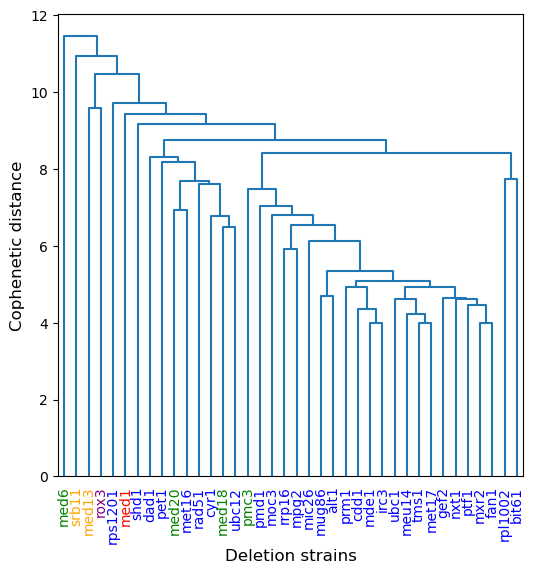

In [154]:
#make dendogram of genes
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
hierarchy.set_link_color_palette(['black'])
#make a linkage matrix
Z = hierarchy.linkage(final_filtered_data.T, 'average')
#plot dendogram
plt.figure(figsize=(6, 6))
dn = hierarchy.dendrogram(Z, labels=final_filtered_data.T.index, leaf_rotation=90, leaf_font_size=8, color_threshold=0, distance_sort='ascending')
#make pretty, larger font

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
#add labels
plt.xlabel('Deletion strains', fontsize=12)
plt.ylabel('Cophenetic distance', fontsize=12)
#color gene name in x axis according to color_df
for i, t in enumerate(plt.gca().xaxis.get_ticklabels()):
      #find the gene name in color_df
      gene = t.get_text()
      #find the color in color_df
      color = color_df[color_df['gene'] == gene]['color'].values[0]
      #set the color
      t.set_color(color)
plt.show()


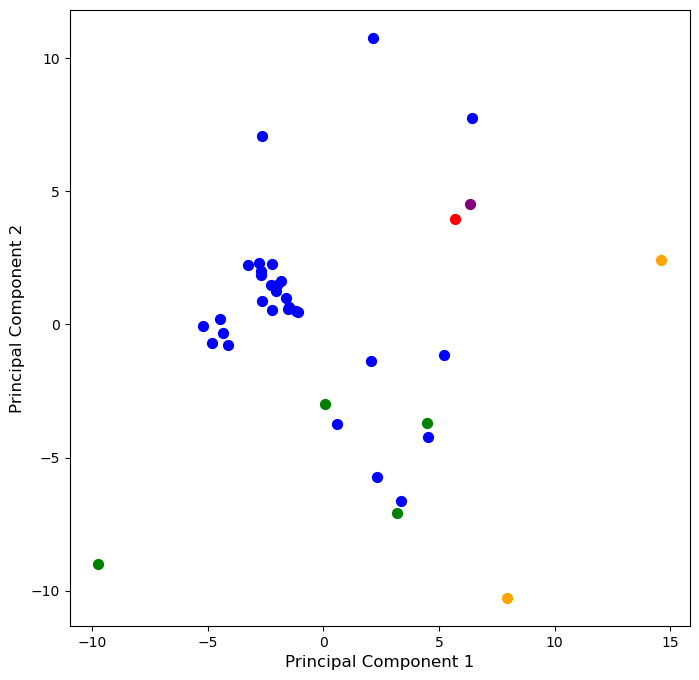

In [156]:
#plot a pca, color by color_df and label as well
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#standardize data
X_std = StandardScaler().fit_transform(final_filtered_data.T)
#make pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#add color column
principalDf['color'] = color_df['color']
#plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
#ax.set_title('2 component PCA', fontsize = 20)
targets = ['red', 'blue', 'green', 'orange', 'purple']
colors = ['r', 'b', 'g', 'orange', 'purple']
for target, color in zip(targets,colors):
      indicesToKeep = principalDf['color'] == target
      ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

In [155]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(final_filtered_data.T))
c

0.9132965312353913

In [85]:
#screen genes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Bioneer screen/adhesion_ratio.csv
screen = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Bioneer screen/adhesion_ratio.csv', sep=',')
screen.head()

,strain,ratio_mean,systematic_name
0,mmp1,0.530057,SPBC2D10.07c
1,dcd1,0.460074,SPBC2G2.13c
2,rpl3602,0.431294,SPBC405.07
3,rpl2102,0.385753,SPAC959.08
4,shm1,0.354162,SPAC24C9.12c


In [86]:
#keep rows where gene_name contains ins screen strain
filtered_data = data[data['gene_name'].isin(screen['strain'])]
#also include ten random strains
#seed 1
np.random.seed(420)
#choose 10 random strains
random = np.random.choice(data.shape[0], 50, replace=False)
#subset data with random strains
random_data = data.iloc[random]
#concatenate filtered_data and random_data
filtered_data = pd.concat([filtered_data, random_data])
#reset index and drop old index
filtered_data = filtered_data.reset_index(drop=True)
#remove floc and gnee_id
filtered_data = filtered_data.drop(columns=['floc', 'gene_id'])
#new index is gene_name
filtered_data = filtered_data.set_index('gene_name')
#transpose
filtered_data = filtered_data.T
#rename gene_name column to condition
final_filtered_data = filtered_data.rename(columns={'gene_name': 'condition'})

color_df = pd.DataFrame(columns=['gene', 'color'])
color_df['gene'] = final_filtered_data.columns
color_df['color'] = np.where(color_df['gene'].isin(screen['strain']), 'red', 'blue')
#remove nans
final_filtered_data = final_filtered_data[final_filtered_data.notna().all(axis=1)]


In [87]:
final_filtered_data

gene_name,rpt6,rpl2702,sre2,csk1,rpl3702,shm1,puf4,dcd1,rpl2102,rrp17,...,coy1,ahk1,bgs4,eca39,tam11,fnp1,trk1,tho3,utp16,mfm2
YES_glucose_0.1percent_32C_10days,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
YES_glucose_0.1percent_32C,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
YES_glucose_0.5percent_32C_10days,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_glucose_0.5percent_32C,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
YES_18,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YES_glucose_1percent_25C_10days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_glucose_3percent_25C_10days,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
YES_32_1week,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES_glucose_0.5percent_25C_1week,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


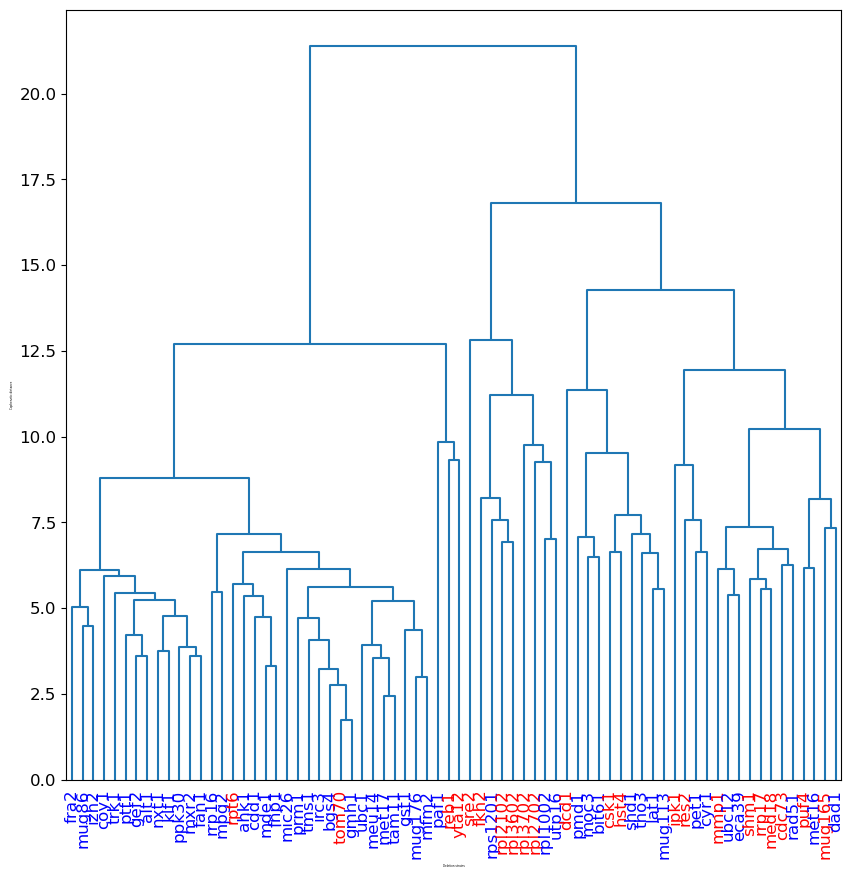

In [88]:
#make dendogram of genes
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
hierarchy.set_link_color_palette(['black'])
#make a linkage matrix
Z = hierarchy.linkage(final_filtered_data.T, 'ward')
#plot dendogram
plt.figure(figsize=(10, 10))
dn = hierarchy.dendrogram(Z, labels=final_filtered_data.T.index, leaf_rotation=90, leaf_font_size=8, color_threshold=0, distance_sort='ascending')
#make pretty, larger font

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
#add labels
plt.xlabel('Deletion strains', fontsize=2)
plt.ylabel('Cophenetic distance', fontsize=2)
#color gene name in x axis according to color_df
for i, t in enumerate(plt.gca().xaxis.get_ticklabels()):
      #find the gene name in color_df
      gene = t.get_text()
      #find the color in color_df
      color = color_df[color_df['gene'] == gene]['color'].values[0]
      #set the color
      t.set_color(color)
plt.show()

In [89]:
data[data['gene_name'].isin(screen['strain'])]

,gene_name,gene_id,YES_glucose_0.1percent_32C_10days,YES_glucose_0.1percent_32C,YES_glucose_0.5percent_32C_10days,YES_glucose_0.5percent_32C,YES_18,YES_glucose_1percent_32C_10days,YES_glucose_1percent_32C,YES_37,...,YES_Diamide_3mM,YES_glucose_0.1percent_25C_10days,YES_glucose_0.5percent_25C_10days,YES_glucose_1percent_25C_10days,YES_glucose_3percent_25C_10days,YES_32_1week,YES_glucose_0.1percent_25C_1week,YES_glucose_0.5percent_25C_1week,YES_glucose_1percent_25C_1week,floc
23,rpt6,SPBC23G7.12c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1
117,rpl2702,SPCC74.05,0.0,1.0,0.0,1.0,-1.0,1.0,1.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
221,sre2,SPBC354.05c,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,0.0,...,NaN,1.0,-1.0,0.0,-1.0,-1.0,NaN,-1.0,-1.0,1
228,csk1,SPAC1D4.06c,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
335,rpl3702,SPCC1223.05c,1.0,-1.0,1.0,0.0,-1.0,1.0,1.0,0.0,...,NaN,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,1
1284,shm1,SPAC24C9.12c,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1285,puf4,SPAC6G9.14,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1291,dcd1,SPBC2G2.13c,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1
1314,rpl2102,SPAC959.08,1.0,1.0,0.0,1.0,-1.0,1.0,1.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,1
1573,rrp17,SPAC29A4.09,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1


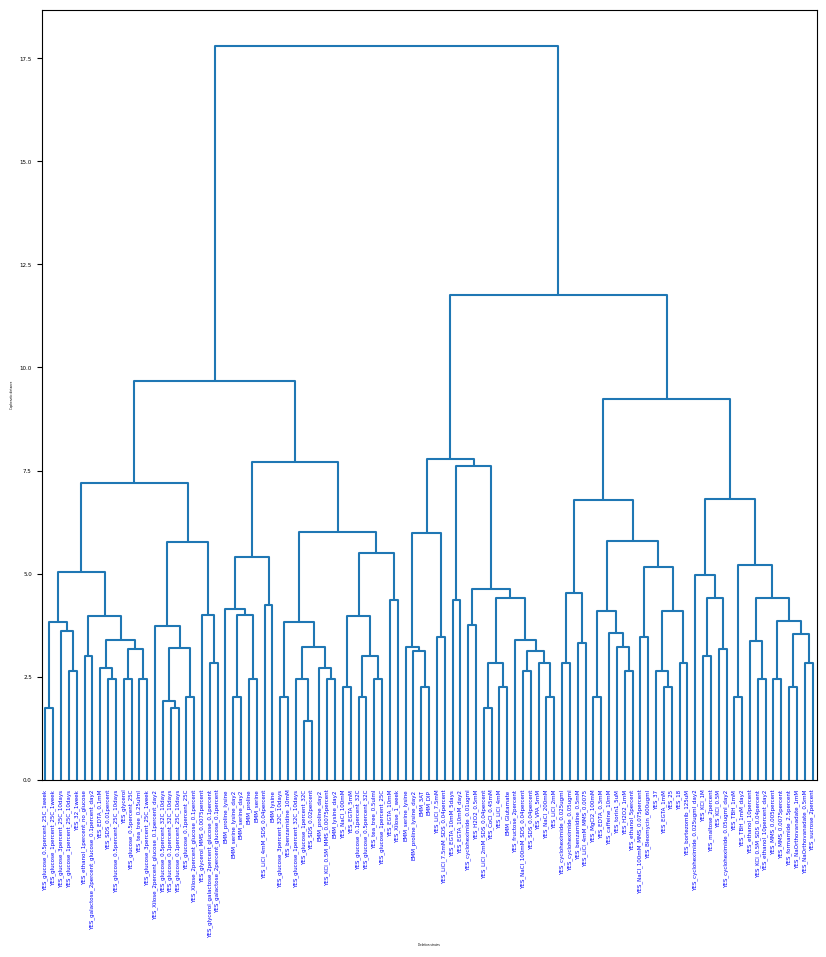

In [90]:
#keep rows where gene_name contains ins screen strain
filtered_data = data[data['gene_name'].isin(screen['strain'])]
#add column adhesion_ratio
filtered_data['adhesion_ratio'] = screen['ratio_mean']

#reset index and drop old index
filtered_data = filtered_data.reset_index(drop=True)
#remove floc and gnee_id
filtered_data = filtered_data.drop(columns=['floc', 'gene_id'])
#new index is gene_name
filtered_data = filtered_data.set_index('gene_name')
#transpose
filtered_data = filtered_data.T
#rename gene_name column to condition
final_filtered_data = filtered_data.rename(columns={'gene_name': 'condition'})
ratio_index = np.where(final_filtered_data.index == 'adhesion_ratio')[0][0]


#remove nans
final_filtered_data = final_filtered_data[final_filtered_data.notna().all(axis=1)]


#make dendogram of genes
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
hierarchy.set_link_color_palette(['black'])
#make a linkage matrix
Z = hierarchy.linkage(final_filtered_data, 'ward')
#plot dendogram
plt.figure(figsize=(10, 10))
dn = hierarchy.dendrogram(Z, labels=final_filtered_data.index, leaf_rotation=90, leaf_font_size=8, color_threshold=0, distance_sort='ascending')
#make pretty, larger font

plt.tick_params(axis='both', which='major', labelsize=4)
plt.tick_params(axis='both', which='minor', labelsize=4)
#add labels
plt.xlabel('Deletion strains', fontsize=2)
plt.ylabel('Cophenetic distance', fontsize=2)
#color gene name in x axis according to color_df
for i, t in enumerate(plt.gca().xaxis.get_ticklabels()):
      #find the gene name in color_df
      gene = t.get_text()
      #find the color in color_df
      color =  "blue"
      if i == ratio_index:
            color = "red"
      #set the color
      t.set_color(color)
plt.show()